In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df_train = pd.read_csv("train2.txt",sep=",")
df_test = pd.read_csv("test2.txt",sep=",")
# df_covid.head()
# df_train.describe(include="all")


In [27]:
df_train

,age,sex,city,province,country,V1,confirmed,symptoms,outcome,duration
0,68,8a467,ba1b5,89dd9,59dcd,35843,07.02.2020,nausea; vomiting,NaN,3
1,25,8a467,44886,fe869,59dcd,d68ec,28.01.2020,pneumonitis,NaN,3
2,73,8a467,b4ff4,38fc4,16725,35843,02.02.2020,respiratory symptoms,Recovery,5
3,20,d516d,07f3f,8ac5e,59dcd,35843,02.02.2020,NaN,Recovery,0
4,50-59,8a467,38fc4,38fc4,c263d,d68ec,04.02.2020,fever,NaN,32
...,...,...,...,...,...,...,...,...,...,...
214,75,8a467,d7cac,d7cac,59dcd,b6ab9,01.02.2020,NaN,NaN,4
215,80,1e6ee,c4d2f,c4d2f,59dcd,35843,25.02.2020,fever,NaN,0
216,55,8a467,bc45c,87899,59dcd,d68ec,26.01.2020,cough; fever,NaN,2
217,57,d516d,73c3e,c26a8,d019a,b6ab9,06.02.2020,NaN,NaN,2


In [28]:
df_test

,Id,age,sex,city,province,country,V1,confirmed,symptoms
0,1,30,8a467,247e5,87899,59dcd,d68ec,23.01.2020,NaN
1,2,30-39,8a467,082c1,bfb97,c263d,b6ab9,27.02.2020,sore throat; fever (38-39 ℃)
2,3,37,8a467,e1d8e,d7cac,59dcd,b3641,21.01.2020,fever
3,4,65,8a467,d9bbf,27e87,59dcd,35843,07.02.2020,fever; myalgia
4,5,10,8a467,2720c,31991,59dcd,b6ab9,09.02.2020,fever
...,...,...,...,...,...,...,...,...,...
195,196,23,8a467,9f74d,fe869,59dcd,d68ec,25.01.2020,pneumonitis
196,197,50-59,8a467,38fc4,e9930,c263d,b6ab9,27.02.2020,malaise; fever (37 ℃); headache; toothache; pn...
197,198,42,d516d,c8de9,fdc9d,59dcd,b6ab9,23.01.2020,cough; fever
198,199,46,8a467,2c9ae,38fc4,fb9d7,35843,11.02.2020,NaN


In [41]:
# df_train.info()
df_train['age'].unique() #there are 2 nan value; 50-59, 60-69,40-49,20-29,70-79,30-39,60-60,80-89,0-10,0-6
# df_train['sex'].unique()# there 5 different sex 
# df_train['city'].unique() # doesn't exist nan
# df_train['province'].unique() # doesn't exist nan
# df_train['country'].unique() # doesn't exist nan
# df_train['symptoms'].unique()
# df_train['duration'].unique() # int64


array(['68', '25', '73', '20', '50-59', '77', '22', '64', '48', '23',
       '44', '16', '49', '28', '57', '39', '31', '75', '33', '56', '62',
       '40', '30', '60-69', '35', '65', '66', '32', '7', '52', '59', '29',
       '60', '55', '40-49', '43', '1', '46', '42', '36', '1.75', '50',
       '80', '54', '20-29', '21', '45', '47', nan, '24', '70-79', '71',
       '96', '27', '53', '34', '61', '5', '41', '30-39', '60-60', '37',
       '69', '80-89', '72', '58', '0-10', '26', '67', '38', '63', '0-6',
       '2', '51'], dtype=object)

In [42]:
# df_test.info()
df_test['age'].unique() #there are 4 nan value; 30-39，50-59，60-69，40-49，40-49，80-89，0-10
# df_test['sex'].unique()# there 5 different sex 
# df_test['city'].unique() # doesn't exist nan
# df_test['province'].unique() # doesn't exist nan
# df_test['country'].unique() # doesn't exist nan
# df_test['symptoms'].unique()
# df_test['duration'].unique() # int64


array(['30', '30-39', '37', '65', '10', '57', '54', '51', '31', '40-49',
       '41', '50-59', '44', '39', '32', '73', '43', '24', '35', '50',
       '36', '45', '33', '61', '38', '20-29', '28', '22', '60', '70-79',
       '53', '60-69', nan, '20', '59', '77', '64', '62', '72', '27', '34',
       '46', '49', '40', '66', '52', '29', '63', '75', '71', '21', '48',
       '3', '55', '68', '26', '18', '42', '56', '80-89', '0-10', '47',
       '23'], dtype=object)

In [48]:
#check_train_nan=df_train['age'].isnull().sum()
#print(check_train_nan)
#check_test_nan=df_test['age'].isnull().sum()
#print(check_test_nan)

df_train['age'].unique()
#

array(['68', '25', '73', '20', '50-59', '77', '22', '64', '48', '23',
       '44', '16', '49', '28', '57', '39', '31', '75', '33', '56', '62',
       '40', '30', '60-69', '35', '65', '66', '32', '7', '52', '59', '29',
       '60', '55', '40-49', '43', '1', '46', '42', '36', '1.75', '50',
       '80', '54', '20-29', '21', '45', '47', nan, '24', '70-79', '71',
       '96', '27', '53', '34', '61', '5', '41', '30-39', '37', '69',
       '80-89', '72', '58', '0-10', '26', '67', '38', '63', '0-6', '2',
       '51'], dtype=object)

In [49]:
df_test['age'].unique()

array(['30', '30-39', '37', '65', '10', '57', '54', '51', '31', '40-49',
       '41', '50-59', '44', '39', '32', '73', '43', '24', '35', '50',
       '36', '45', '33', '61', '38', '20-29', '28', '22', '60', '70-79',
       '53', '60-69', nan, '20', '59', '77', '64', '62', '72', '27', '34',
       '46', '49', '40', '66', '52', '29', '63', '75', '71', '21', '48',
       '3', '55', '68', '26', '18', '42', '56', '80-89', '0-10', '47',
       '23'], dtype=object)

In [46]:
## replace all age range to integer number
df_train['age']=df_train['age'].replace(['60-60'],'60')
df_train['age'].unique()

array(['68', '25', '73', '20', '50-59', '77', '22', '64', '48', '23',
       '44', '16', '49', '28', '57', '39', '31', '75', '33', '56', '62',
       '40', '30', '60-69', '35', '65', '66', '32', '7', '52', '59', '29',
       '60', '55', '40-49', '43', '1', '46', '42', '36', '1.75', '50',
       '80', '54', '20-29', '21', '45', '47', nan, '24', '70-79', '71',
       '96', '27', '53', '34', '61', '5', '41', '30-39', '37', '69',
       '80-89', '72', '58', '0-10', '26', '67', '38', '63', '0-6', '2',
       '51'], dtype=object)

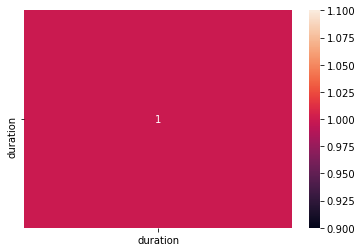

In [40]:
import pandas as pd
from collections import defaultdict
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.linear_model import BayesianRidge, LinearRegression


In [ ]:
def cal_time(x):
    return (x - pd.Timestamp('2020-01-01'))

def cal_average(agerange):
    
    if type(agerange) is str and '-' in agerange: 
        age = agerange.split('-')
        return (int(age[0])+int(age[1]))/2
    else:
        if type(agerange) == float and math.isnan(agerange):
            return 50
        return agerange

def label_helper(series):
    dic = {}
    counter = 0
    for s in series:
        if s in dic.keys():
            continue
        else:
            dic[s] = str(counter)
            counter += 1
    return dic

def convert_label(df, headers):
    for i in range(len(headers)):
        h = headers[i]
        df[h] = df[h].apply(label_helper(df[h]).get)


In [ ]:
train = pd.read_csv('train_clean_dataset.csv')
test = pd.read_csv('test_clean_dataset.csv')

train['confirmed'] = pd.to_datetime(train['confirmed'], format='%d.%m.%Y')
train['confirmed'] = train['confirmed'].apply(cal_time).dt.days

test['confirmed'] = pd.to_datetime(test['confirmed'], format='%d.%m.%Y')
test['confirmed'] = test['confirmed'].apply(cal_time).dt.days


In [ ]:
label_transform('sex')
label_transform('city')
label_transform('province')
label_transform('country')
label_transform('V1')
train['confirmed'] = train['confirmed'].apply(cal_average)
test['confirmed'] = test['confirmed'].apply(cal_average)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, (train.columns != 'duration') 
                                                              & (train.columns != 'Id') 
                                                            ], train['duration'], 
                                                    test_size=0.005, random_state=200)
test_train = test.loc[:,  (test.columns != 'Id')]



In [ ]:
kernel = DotProduct() +1 * RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train, y_train)
print('gpr score: '+ str(gpr.score(X_train, y_train)))
predict_result_gussian = gpr.predict(X_test, return_std=True)


regr = svm.SVR(kernel='linear').fit(X_train, y_train)
predict_result = regr.predict(X_test)
mse = (mean_squared_error(list(predict_result_gussian[0]), y_test))**(1/2)

In [ ]:
predict_result_gussian = gpr.predict(test_train, return_std=True)
result_df = pd.DataFrame(columns=['Id', 'duration'])
result_df['Id'] = test['Id']+1
result_df['duration'] = predict_result_gussian[0]
result_df.to_csv('result_guassian.csv',index=False)